In [90]:
try:
    import nqcpfem
except ModuleNotFoundError as err:
    import sys
        # put path to nqcpfem module here   
    src_path = '/mnt/c/Users/olisc/NQCP/NQCP_FEM/'
    sys.path.append(src_path)
    import nqcpfem
import sympy
sympy.init_printing(use_latex='mathjax')
import IPython.display as disp
from matplotlib import pyplot as plt
import numpy as np
import os

import logging
logging.getLogger().setLevel(logging.DEBUG)

E0 = 1/(nqcpfem.UNIT_CONVENTION['J to eV']*1e6) # unit_scale: 1muev
from nqcpfem.parameter_search import DBMPParameterSearch

search = DBMPParameterSearch([],None,'temp')
search.db_name = 'db_sweet_spot_low4.db'

base_dir = "short_sc/results/wide_sc_range/"
base_dir = "/mnt/c/Users/olisc/NQCP/NQCP_FEM/slurm/optimize/"
#filename = "optimize_low"
filename='sweet_spot_HD'
filename='optimize_low'

base_dir = "/mnt/c/Users/olisc/NQCP/NQCP_FEM/slurm/optimize/failed/"
filename="optimize_200"

base_dir = "/mnt/c/Users/olisc/NQCP/NQCP_FEM/slurm/optimize/290/"
filename="optimize_290"

base_dir = "/mnt/c/Users/olisc/NQCP/NQCP_FEM/slurm/optimize/"
filename="optimize_long"
search.db_name = base_dir+'db_'+filename+'.db'
import pickle as pkl
with open (base_dir+f'param_'+filename+'.pkl','rb') as f:
    parameter_set = pkl.load(f)


In [91]:
import pandas as pd
from nqcpfem.envelope_function import sort_eigenvalues
#N = min(r[0].shape[0] for r in search.results )
N=8
import shelve
dicts = []
with search.__db__() as db:
    for i,p in enumerate(parameter_set):
        p = p.copy()
        try:
            result = db[str(i)]
        except KeyError as err:
            continue
        
        names = ('T','Tso','D','Dso')
        if isinstance(result,float):
            continue
        for n,v in zip(names,result):
            if v >0.00001:
                p[n] = v*4.806529901999998e-25/E0
            else:
                p[n] = v/E0

        dicts.append(p)

        
df = pd.DataFrame(dicts)
df['mu_sc_val'] = df['mu_sc_val']/E0


(0.0, 2.0)

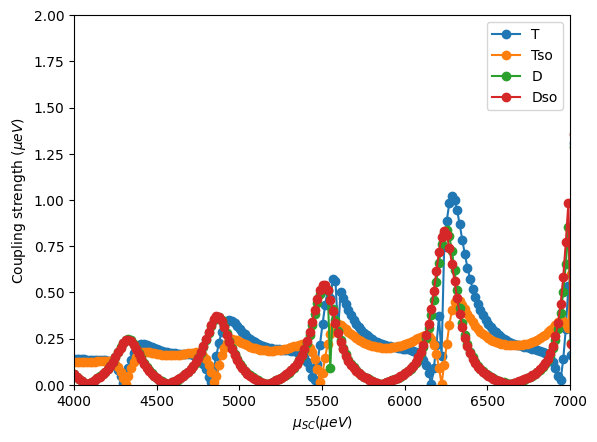

In [93]:
ax=df.plot('mu_sc_val',list(names),marker='o')
ax.set_xlabel(r'$\mu_{SC} (\mu eV)$')
ax.set_ylabel(r'Coupling strength $(\mu eV)$')
ax.set_xlim(4e3,7e3)
ax.set_ylim(0,2)
#ax.axvline(7005.9)
ax.set_title(r'$L_sc$')

(0.0, 10.0)

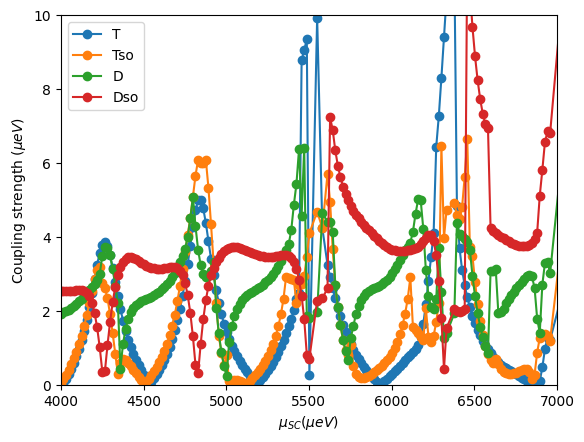

In [89]:
ax=df.plot('mu_sc_val',list(names),marker='o')
ax.set_xlabel(r'$\mu_{SC} (\mu eV)$')
ax.set_ylabel(r'Coupling strength $(\mu eV)$')
ax.set_xlim(4e3,7e3)
ax.set_ylim(0,10)
#ax.axvline(7005.9)

In [79]:
df['mu_sc_val'].iloc[ (df['mu_sc_val']-70).abs().argmin()]

7005.870841487281

In [26]:
df.iloc[[20,29]]

,mu_sc_val,T,Tso,D,Dso
20,4297.244094,0.139473,0.101717,0.154387,0.136146
29,4318.503937,0.152606,0.124044,0.112901,0.100716


In [19]:
from nqcpfem.parameter_search import ParameterSearch

def model_eval():
    pass
PM = ParameterSearch.load('debug_optim_outlier.save')
len(PM.results)

EOFError: Ran out of input